In [51]:
rm(list = ls())
getwd()
#result read---------------------------------------------------------
CBCL_w.est=as.matrix(read.table('../CBCL/result/CBCL_west.txt'))
YSR_w.est=as.matrix(read.table('../YSR/result/YSR_west.txt'))
dim(YSR_w.est)
dim(CBCL_w.est)
nitem=dim(CBCL_w.est)[1]

[1] "D:/지도교수님 면담/01_15_CBCL/CBCL_DA_RUN/notebook"

[1] 118   2

[1] 118   2

In [52]:
#install.packages('xlsx')
library(xlsx)
raw_data=read.xlsx('C:/Users/admin/내파일/지도교수님 면담/01_15_CBCL/CBCL/CBCL.xlsx',sheetIndex=1,startRow=2,header = T)

# About theta

,V1
V1,0.3503182



Call:
lm(formula = YSR_theta.est ~ CBCL_theta.est)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65899 -0.55464 -0.04056  0.53243  2.28194 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.06430    0.03052   2.107   0.0355 *  
CBCL_theta.est  0.23883    0.02486   9.609   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7848 on 660 degrees of freedom
Multiple R-squared:  0.1227,	Adjusted R-squared:  0.1214 
F-statistic: 92.33 on 1 and 660 DF,  p-value: < 2.2e-16


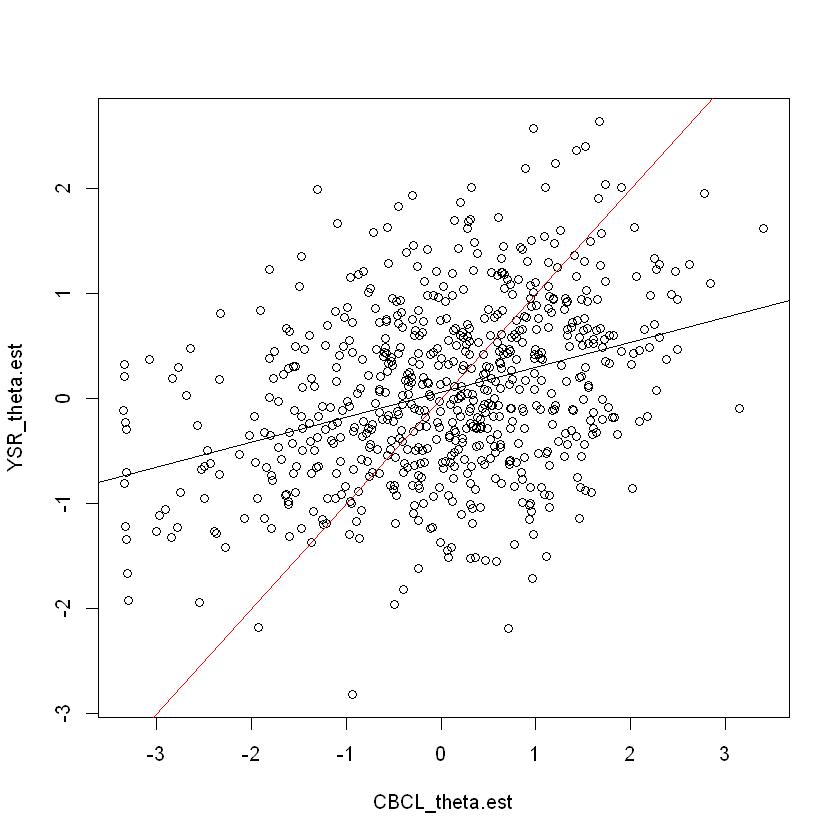

In [24]:
stopifnot(length(CBCL_theta.est)==length(YSR_theta.est))

plot(CBCL_theta.est,YSR_theta.est)#사람들은 대체로 비슷. 성향이 얼추 비슷할테니 그를 수 있을듯.
cor(CBCL_theta.est,YSR_theta.est)
lm3=lm(YSR_theta.est~CBCL_theta.est)
abline(a=0, b=1, col="red")
abline(a=lm3$coefficients[1],b=lm3$coefficients[2])
summary(lm3)

# About beta


Call:
lm(formula = YSR_beta.est[!(outlier_list)] ~ CBCL_beta.est[!(outlier_list)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96778 -0.43258 -0.02837  0.42162  1.65447 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.57068    0.06234   9.154 6.07e-15 ***
CBCL_beta.est[!(outlier_list)]  0.70412    0.04595  15.324  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6007 on 102 degrees of freedom
Multiple R-squared:  0.6972,	Adjusted R-squared:  0.6942 
F-statistic: 234.8 on 1 and 102 DF,  p-value: < 2.2e-16


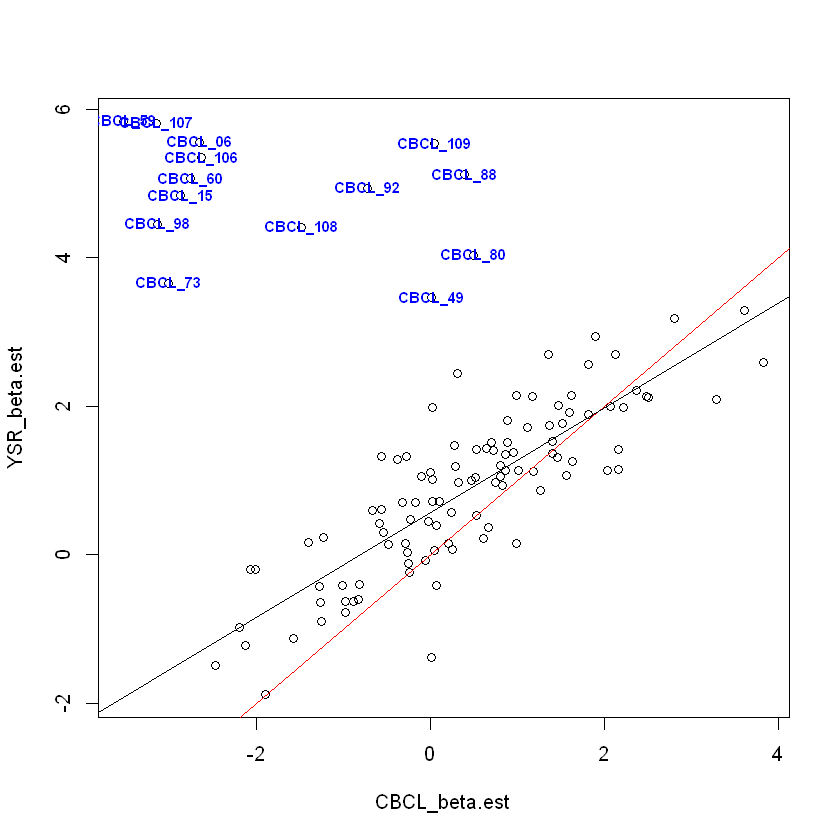

In [19]:
#matrix간에 유사도 재기? gram matrix? 단순corr?
item_name=as.character(as.matrix(read.table('../item_name.txt')))
#beta theta-------------------------------------------------------------
CBCL_beta.est=as.matrix(read.table('../CBCL/result/CBCL_betaest.txt'))
YSR_beta.est=as.matrix(read.table('../YSR/result/YSR_betaest.txt'))
CBCL_theta.est=as.matrix(read.table('../CBCL/result/CBCL_thetaest.txt'))
YSR_theta.est=as.matrix(read.table('../YSR/result/YSR_thetaest.txt'))

plot(CBCL_beta.est,YSR_beta.est)#어랏 반대인 문항들이 있다!
outlier_list=(CBCL_beta.est<(0.8))&(YSR_beta.est>2.5) #하드코딩으로 그냥 가져옴
check_item=item_name[outlier_list] #인덱스 불러오기 위해 앞서 만든 메트릭스 가져옴.
text(CBCL_beta.est[outlier_list],YSR_beta.est[outlier_list],labels=check_item,cex=0.75,font=2,col=4)

lm2=lm(YSR_beta.est[!(outlier_list)]~CBCL_beta.est[!(outlier_list)])
summary(lm2)
abline(a=0, b=1, col="red")
abline(a=lm2$coefficients[1],b=lm2$coefficients[2])

In [11]:
raw_data[raw_data$Variable%in%check_item,c('Question','Variable')]
#beta는 item easiness. 애들은 잘 대답했는데 부모는 대답 안했다.=>애들만 대답할 수 있는 문항?
#ex 성적문제는 부모는 (몰라서) 아니라고 대답 but 애들은 (본인이니까) 맞다고 대답

,Question,Variable
6,6. Bowel movements outside toilet,CBCL_06
15,15. Cruel to animals,CBCL_15
49,"49. Constipated, doesn't move bowels",CBCL_49
67,59. Plays with own sex parts in public,CBCL_59
68,60. Plays with own sex parts too much,CBCL_60
81,73. Sexual problems,CBCL_73
88,80. Stares blankly,CBCL_80
96,88. Sulks a lot,CBCL_88
100,92. Talks or walks in sleep,CBCL_92
106,98. Thumb-sucking,CBCL_98


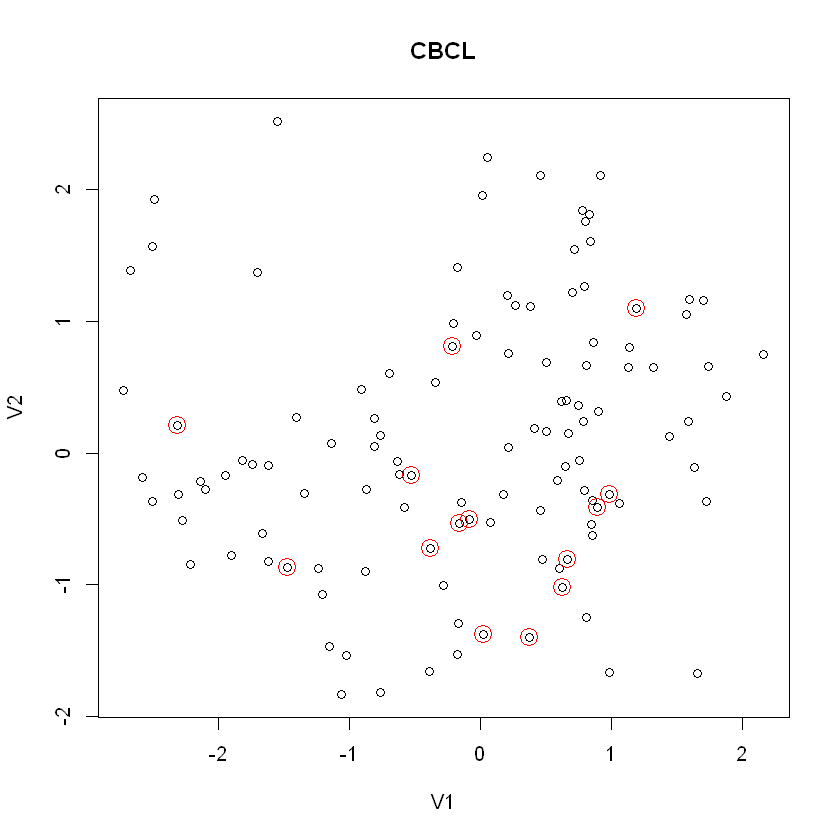

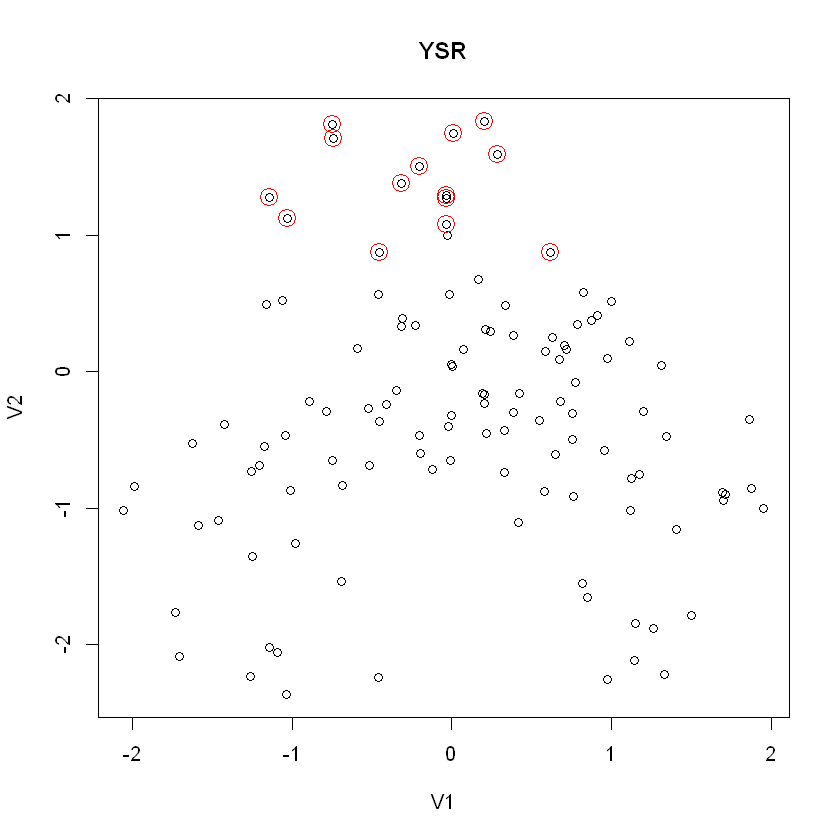

In [21]:
#beta outlier문항에 대해 coord 보기-----------------------------

plot(CBCL_w.est,main='CBCL')
points((CBCL_w.est[outlier_list,]),col=2,cex=2)

plot(YSR_w.est,main='YSR')
points((YSR_w.est[outlier_list,]),col=2,cex=2)
#ysr에서 강하게나타난다. 해당 문항에서의 부모들은 특성을 몰랐으니 그럴 수 있을 수도.



### YSR(yourself reponse)에서는 차이나는 문항들이 잘 묶여있다. 부모들은 몰랐던 아이들의 응답 행태

# About distance

[1] 0.5765433

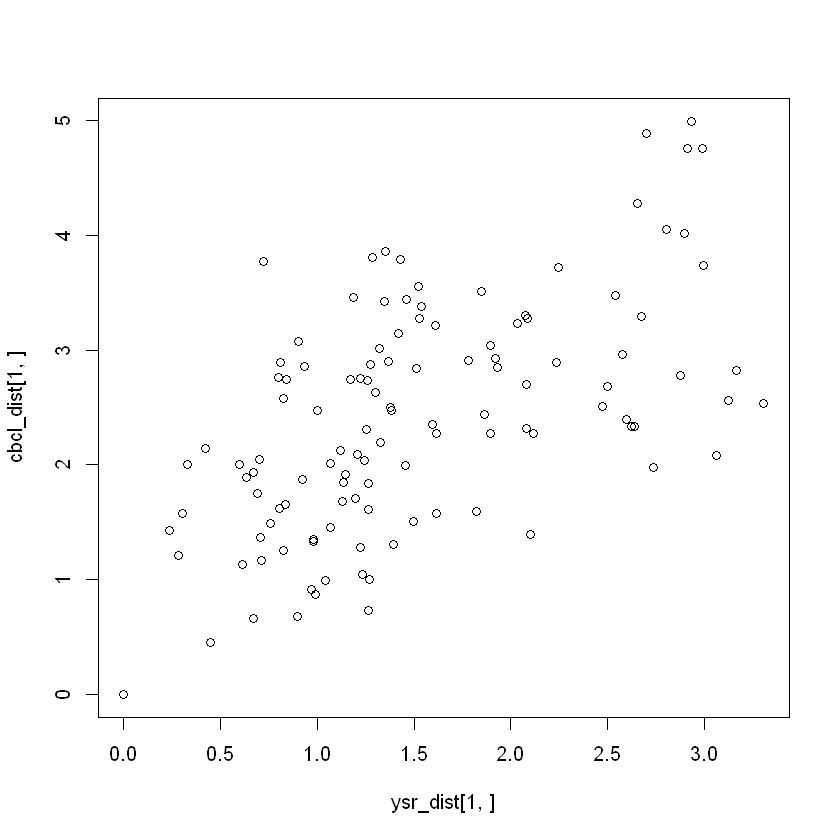

In [16]:
cbcl_dist=as.matrix(dist(CBCL_w.est))
ysr_dist=as.matrix(dist(YSR_w.est))
#corr------------------------------------------------------
#hist(cbcl_dist[1,],nclass=50)
#hist(ysr_dist[1,],nclass=50)
#한 item에 대한 distance.#dist diff=0인지 paired t test해볼수도
cor(ysr_dist[1,],cbcl_dist[1,])
plot(ysr_dist[1,],cbcl_dist[1,])

[1] 0.465565


Call:
lm(formula = ysr_dist_upper ~ cbcl_dist_upper)

Coefficients:
    (Intercept)  cbcl_dist_upper  
         0.8944           0.4084  



Call:
lm(formula = ysr_dist_upper ~ cbcl_dist_upper)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3041 -0.5816 -0.0567  0.5081  3.3610 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.894356   0.020787   43.02   <2e-16 ***
cbcl_dist_upper 0.408393   0.009345   43.70   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7843 on 6901 degrees of freedom
Multiple R-squared:  0.2168,	Adjusted R-squared:  0.2166 
F-statistic:  1910 on 1 and 6901 DF,  p-value: < 2.2e-16


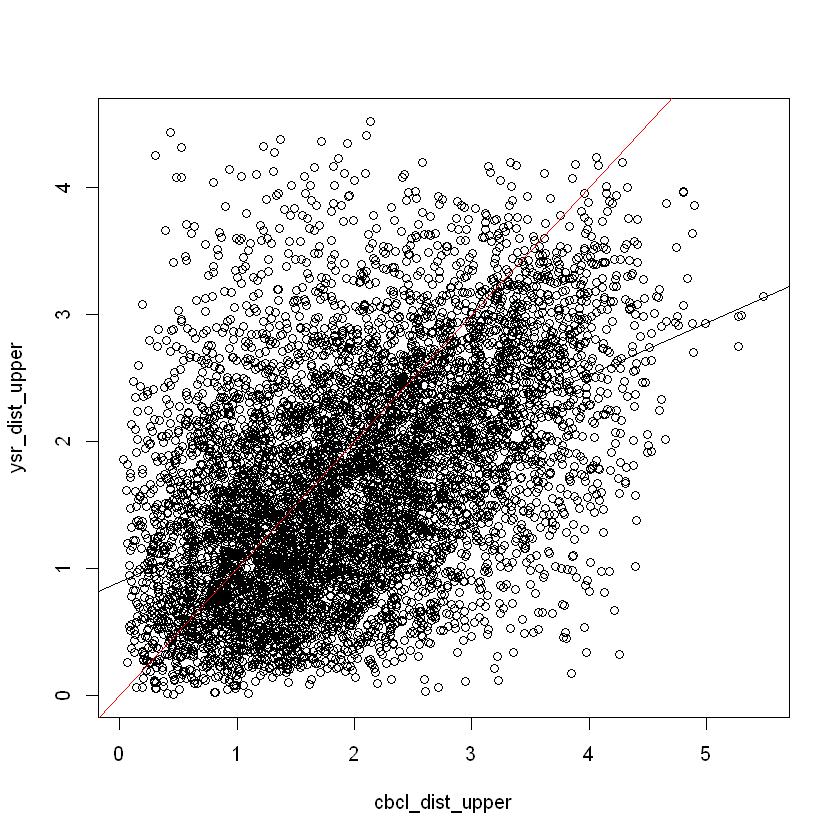

In [15]:
#upper dist에 대해서
cbcl_dist_upper=cbcl_dist[upper.tri(cbcl_dist)]
ysr_dist_upper=ysr_dist[upper.tri(ysr_dist)]
cor(cbcl_dist_upper,ysr_dist_upper)
plot(cbcl_dist_upper,ysr_dist_upper)
abline(a=0, b=1, col="red")
lm1=lm(ysr_dist_upper~cbcl_dist_upper);lm1
abline(a=lm1$coefficients[1],b=lm1$coefficients[2])
summary(lm1)#아이들간의 거리가 전반적으로 더 떨어져 있다.

[1] 0.5872882


Call:
lm(formula = ysr_dist_upper ~ cbcl_dist_upper)

Coefficients:
    (Intercept)  cbcl_dist_upper  
         0.6166           0.4736  



Call:
lm(formula = ysr_dist_upper ~ cbcl_dist_upper)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30420 -0.48710 -0.02966  0.46673  2.18783 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.61662    0.02026   30.44   <2e-16 ***
cbcl_dist_upper  0.47361    0.00892   53.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6734 on 5354 degrees of freedom
Multiple R-squared:  0.3449,	Adjusted R-squared:  0.3448 
F-statistic:  2819 on 1 and 5354 DF,  p-value: < 2.2e-16


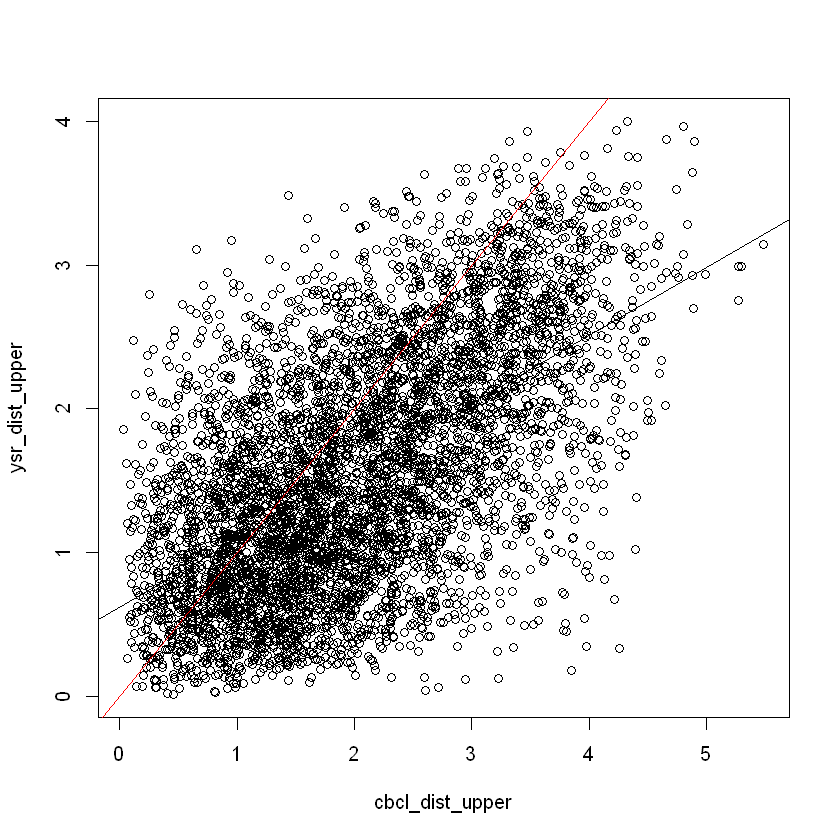

In [26]:
#만약 일치하지 않은 애들을 따로 빼면--------------------------
cbcl_dist=as.matrix(dist(CBCL_w.est[!(outlier_list),]))
ysr_dist=as.matrix(dist(YSR_w.est[!(outlier_list),]))

cbcl_dist_upper=cbcl_dist[upper.tri(cbcl_dist)]
ysr_dist_upper=ysr_dist[upper.tri(ysr_dist)]
cor(cbcl_dist_upper,ysr_dist_upper)
plot(cbcl_dist_upper,ysr_dist_upper)
abline(a=0, b=1, col="red")
lm1=lm(ysr_dist_upper~cbcl_dist_upper);lm1
abline(a=lm1$coefficients[1],b=lm1$coefficients[2])
summary(lm1)#아이들간의 거리가 전반적으로 더 떨어져 있다.

[1] 0.1453888


Call:
lm(formula = ysr_dist_upper ~ cbcl_dist_upper)

Coefficients:
    (Intercept)  cbcl_dist_upper  
        0.66918          0.06695  



Call:
lm(formula = ysr_dist_upper ~ cbcl_dist_upper)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72704 -0.23898 -0.03389  0.25626  1.03250 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.66918    0.08286   8.076 3.04e-12 ***
cbcl_dist_upper  0.06695    0.04829   1.386    0.169    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3759 on 89 degrees of freedom
Multiple R-squared:  0.02114,	Adjusted R-squared:  0.01014 
F-statistic: 1.922 on 1 and 89 DF,  p-value: 0.1691


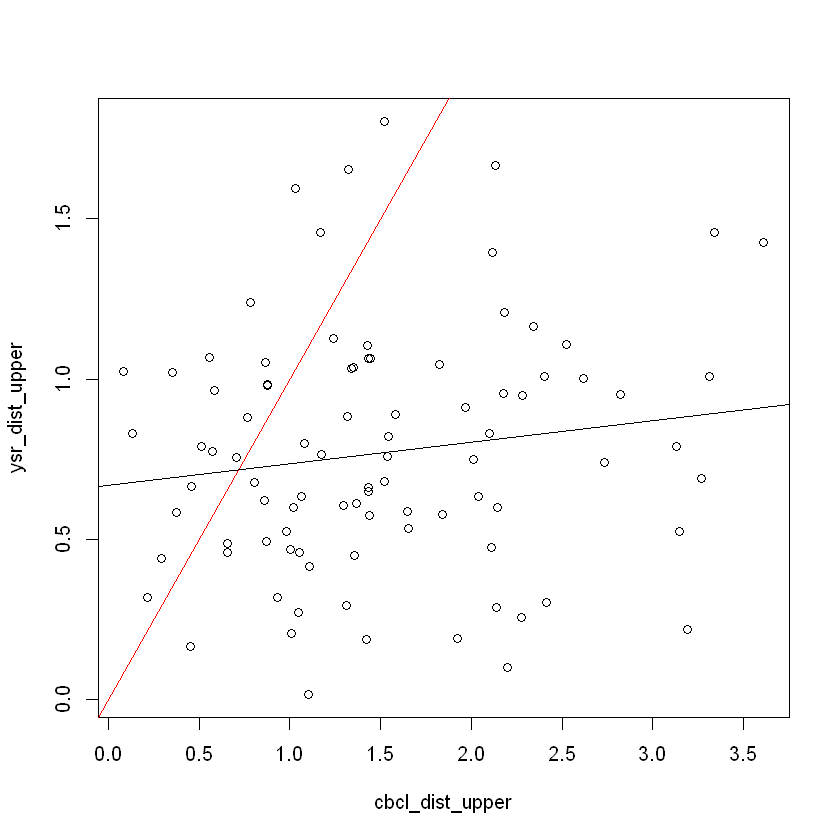

In [27]:
#만약 일치하지 않은 애들을 따로 빼면--------------------------
cbcl_dist=as.matrix(dist(CBCL_w.est[(outlier_list),]))
ysr_dist=as.matrix(dist(YSR_w.est[(outlier_list),]))


cbcl_dist_upper=cbcl_dist[upper.tri(cbcl_dist)]
ysr_dist_upper=ysr_dist[upper.tri(ysr_dist)]
cor(cbcl_dist_upper,ysr_dist_upper)
plot(cbcl_dist_upper,ysr_dist_upper)
abline(a=0, b=1, col="red")
lm1=lm(ysr_dist_upper~cbcl_dist_upper);lm1
abline(a=lm1$coefficients[1],b=lm1$coefficients[2])
summary(lm1)#아이들간의 거리가 전반적으로 더 떨어져 있다.

# distance compare

In [44]:
# # 각 iterm의 distance차이 보기
# cbcl_dist=as.matrix(dist(CBCL_w.est[,]))
# ysr_dist=as.matrix(dist(YSR_w.est[,]))

# targ_idx=which(outlier_list)[7]
# targ_cbcl_dist=cbcl_dist[targ_idx,]
# targ_ysr_dist=ysr_dist[targ_idx,]
# #hist(targ_cbcl_dist,nclass=50)
# #hist(targ_ysr_dist,nclass=50)
# cor(targ_ysr_dist,targ_cbcl_dist)
# plot(targ_ysr_dist,targ_cbcl_dist)
# hist(targ_cbcl_dist-targ_ysr_dist,nclass=50)

# #dist diff=0인지 paired t test
# pv=var.test(targ_cbcl_dist,targ_ysr_dist)$p.value #0.05이하면 분산이 다르다.
# inp_eq_var=pv>0.05
# ttest_res=t.test(targ_cbcl_dist, targ_ysr_dist,  paired = TRUE, var.equal = inp_eq_var)
# ttest_res$p.value

In [56]:
pv_list=rep(NA,nitem)
cbcl_dist=as.matrix(dist(CBCL_w.est[,]))
ysr_dist=as.matrix(dist(YSR_w.est[,]))

for(targ_idx in 1:nitem){
    # 각 iterm의 distance차이 보기
    targ_cbcl_dist=cbcl_dist[targ_idx,]
    targ_ysr_dist=ysr_dist[targ_idx,]

    #dist diff=0인지 paired t test
    pv=var.test(targ_cbcl_dist,targ_ysr_dist)$p.value #0.05이하면 분산이 다르다.
    inp_eq_var=pv>0.05
    ttest_res=t.test(targ_cbcl_dist, targ_ysr_dist,  paired = TRUE, var.equal = inp_eq_var)
    pv_list[targ_idx]=ttest_res$p.value    
}    

In [57]:
item_name[which(pv_list>0.05)]

[1] "CBCL_05"  "CBCL_13"  "CBCL_15"  "CBCL_22"  "CBCL_31"  "CBCL_36" 
 [7] "CBCL_44"  "CBCL_47"  "CBCL_49"  "CBCL_50"  "CBCL_63"  "CBCL_72" 
[13] "CBCL_81"  "CBCL_85"  "CBCL_94"  "CBCL_98"  "CBCL_103" "CBCL_106"
[19] "CBCL_112"

### distance의 diff가 0인 아이템들

In [59]:
mean(pv_list[outlier_list]<0.05)

[1] 0.7142857

In [61]:
mean(pv_list[!outlier_list]<0.05)

[1] 0.8557692